# PolitiFact Fact-Check Dataset

In [1]:
# Setup Notebook - Applied Machine Learning Project
# Data Loading and Basic Exploration

# Import required libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 2.1.3


### Environment Check

In [ ]:
print("ENVIRONMENT VERIFICATION")


import sys
print(f"\nPython version: {sys.version}")
print(f"Python executable: {sys.executable}")

# Import and verify required libraries
print("\nVerifying required libraries...")

try:
    import pandas as pd
    print(f"✓ Pandas {pd.__version__} - OK")
except ImportError as e:
    print(f"✗ Pandas - FAILED: {e}")

try:
    import numpy as np
    print(f"✓ NumPy {np.__version__} - OK")
except ImportError as e:
    print(f"✗ NumPy - FAILED: {e}")

try:
    import json
    print(f"✓ JSON (built-in) - OK")
except ImportError as e:
    print(f"✗ JSON - FAILED: {e}")

try:
    import matplotlib
    import matplotlib.pyplot as plt
    print(f"✓ Matplotlib {matplotlib.__version__} - OK")
except ImportError as e:
    print(f"✗ Matplotlib - FAILED: {e}")

try:
    import seaborn as sns
    print(f"✓ Seaborn {sns.__version__} - OK")
except ImportError as e:
    print(f"✗ Seaborn - FAILED: {e}")

try:
    from pathlib import Path
    print(f"✓ Pathlib (built-in) - OK")
except ImportError as e:
    print(f"✗ Pathlib - FAILED: {e}")

# Test basic functionality
print("\nTesting basic functionality...")

try:
    # Test NumPy
    test_array = np.array([1, 2, 3, 4, 5])
    assert test_array.mean() == 3.0
    print("✓ NumPy operations - OK")
except Exception as e:
    print(f"✗ NumPy operations - FAILED: {e}")

try:
    # Test Pandas
    test_df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
    assert len(test_df) == 3
    assert list(test_df.columns) == ['A', 'B']
    print("✓ Pandas operations - OK")
except Exception as e:
    print(f"✗ Pandas operations - FAILED: {e}")

try:
    # Test JSON
    test_json = json.dumps({'key': 'value'})
    test_parsed = json.loads(test_json)
    assert test_parsed['key'] == 'value'
    print("✓ JSON operations - OK")
except Exception as e:
    print(f"✗ JSON operations - FAILED: {e}")

try:
    # Test Matplotlib
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    ax.plot([1, 2, 3], [1, 2, 3])
    plt.close(fig)
    print("✓ Matplotlib plotting - OK")
except Exception as e:
    print(f"✗ Matplotlib plotting - FAILED: {e}")

print("\n" + "="*80)
print("ENVIRONMENT VERIFICATION COMPLETE")
print("="*80)
print("✓ All checks passed! Environment is ready for machine learning tasks.\n")

In [3]:
# Load Politifact Dataset
print("Politifact Dataset")
# Define file path
politifact_path = Path('/Users/satwik/Documents/GitHub/UF-EEE6778-Fall25-TermProject/data/raw/politifact_factcheck_data.json')

# Load JSON file (handle both regular JSON and JSONL format)
politifact_data = []
try:
    # Try loading as regular JSON first
    with open(politifact_path, 'r') as f:
        politifact_data = json.load(f)
except json.JSONDecodeError:
    # If that fails, try loading as JSONL (one JSON object per line)
    print("Loading as JSONL format (one JSON object per line)...")
    with open(politifact_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line:  # Skip empty lines
                politifact_data.append(json.loads(line))

# Convert to DataFrame
df_politifact = pd.DataFrame(politifact_data)

print(f"\n✓ Politifact dataset loaded successfully!")
print(f"Dataset shape: {df_politifact.shape}")

# Basic Data Exploration - Politifact


print("1. First Few Rows (head)")
print(df_politifact.head(25))


print("2. Dataset Information (info)")
df_politifact.info()


print("3. Statistical Summary (describe)")
print(df_politifact.describe(include='all'))


print("4. Column Names")
print("Columns:", list(df_politifact.columns))


print("5. Missing Values")
missing_values = df_politifact.isnull().sum()
missing_percentage = (missing_values / len(df_politifact)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])


print("6. Value Counts for Key Columns")

# Identify potential verdict/label columns
for col in df_politifact.columns:
    if any(keyword in col.lower() for keyword in ['verdict', 'label', 'rating', 'ruling', 'class']):
        print(f"\nValue counts for '{col}':")
        print(df_politifact[col].value_counts())
        print(f"Unique values: {df_politifact[col].nunique()}")

Politifact Dataset
Loading as JSONL format (one JSON object per line)...

✓ Politifact dataset loaded successfully!
Dataset shape: (21152, 8)
1. First Few Rows (head)
         verdict      statement_originator  \
0           true              Barack Obama   
1          false                Matt Gaetz   
2    mostly-true              Kelly Ayotte   
3          false                  Bloggers   
4      half-true              Bobby Jindal   
5           true                 S.E. Cupp   
6          false          Michele Bachmann   
7           true             George Turner   
8    mostly-true               Kent Conrad   
9           true            Mandela Barnes   
10    pants-fire              Chris Telfer   
11         false             Carlos Beruff   
12   mostly-true           Hillary Clinton   
13         false             Sidney Powell   
14   mostly-true            Stephen Carter   
15    pants-fire  Americans for Prosperity   
16  mostly-false              Bob Buckhorn   
17  m

### Basic Exploratory Data Analysis on PolitiFact Dataset

### 1. Verdict Distribution

EDA #1: VERDICT DISTRIBUTION - POLITIFACT


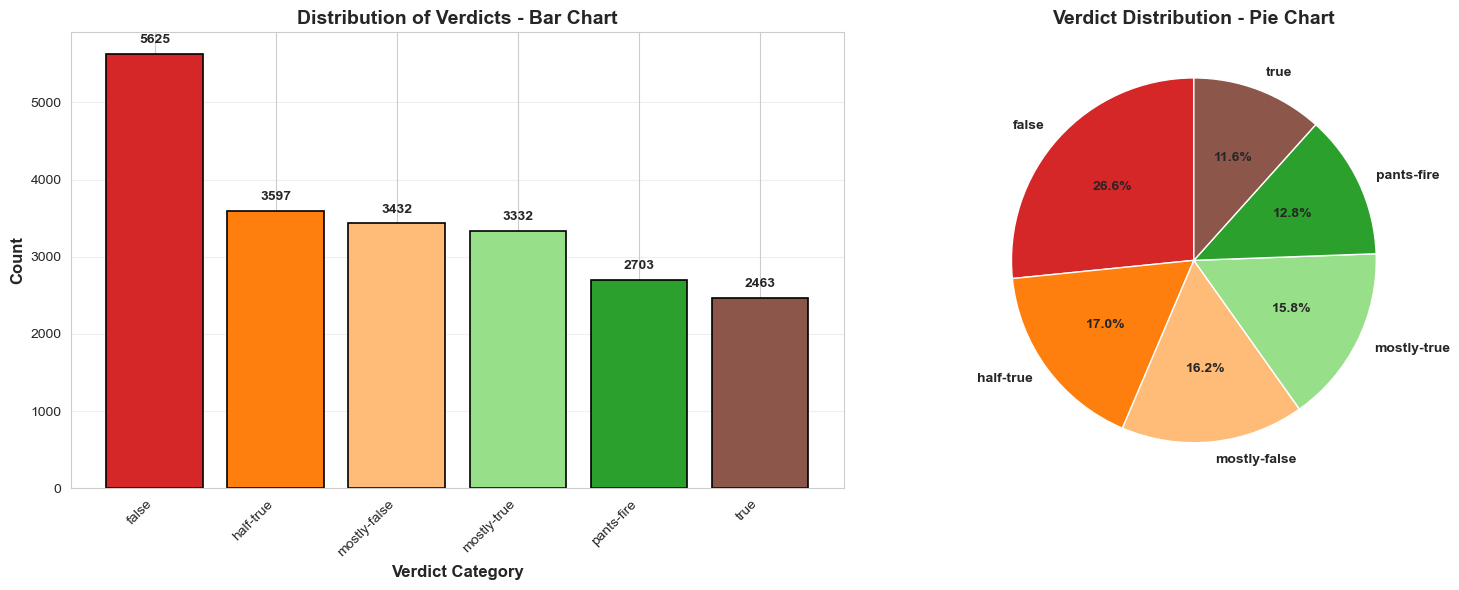


Total statements: 21152
Most common verdict: false (5625 statements, 26.6%)
Least common verdict: true (2463 statements, 11.6%)


In [4]:
print("EDA #1: VERDICT DISTRIBUTION - POLITIFACT")

# Create figure with larger size
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
verdict_counts = df_politifact['verdict'].value_counts()
colors = ['#d62728', '#ff7f0e', '#ffbb78', '#98df8a', '#2ca02c', '#8c564b']
axes[0].bar(range(len(verdict_counts)), verdict_counts.values, color=colors, edgecolor='black', linewidth=1.2)
axes[0].set_xticks(range(len(verdict_counts)))
axes[0].set_xticklabels(verdict_counts.index, rotation=45, ha='right')
axes[0].set_xlabel('Verdict Category', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Verdicts - Bar Chart', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(verdict_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(verdict_counts.values, labels=verdict_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[1].set_title('Verdict Distribution - Pie Chart', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print statistics
print(f"\nTotal statements: {len(df_politifact)}")
print(f"Most common verdict: {verdict_counts.index[0]} ({verdict_counts.values[0]} statements, {verdict_counts.values[0]/len(df_politifact)*100:.1f}%)")
print(f"Least common verdict: {verdict_counts.index[-1]} ({verdict_counts.values[-1]} statements, {verdict_counts.values[-1]/len(df_politifact)*100:.1f}%)")

Findings from Verdict Distribution EDA:

- Significant Class Imbalance: The most critical finding from this result is that my Dataset is Imbalanced. The six verdict categories are not represented equally.

"False" is the Majority Class: The "false" verdict is the most common, accounting for 26.6% of all statements (5,625 entries). This is significantly more than any other category and "True" is the Rarest Class: The "true" verdict is the least common, making up only 11.6% of the dataset (2,463 entries).

- Skew Towards Falsehood: If you group the categories, the data is heavily skewed towards untruths:

a. False-leaning statements ("false", "mostly-false", "pants-fire") make up 55.6% of the dataset (11,760 statements).

b. True-leaning statements ("true", "mostly-true") only account for 27.4% (5,795 statements).

c. "Half-true" sits in the middle at 17.0%.

### 2. Top Statement Originators

EDA #2: TOP STATEMENT ORIGINATORS - POLITIFACT


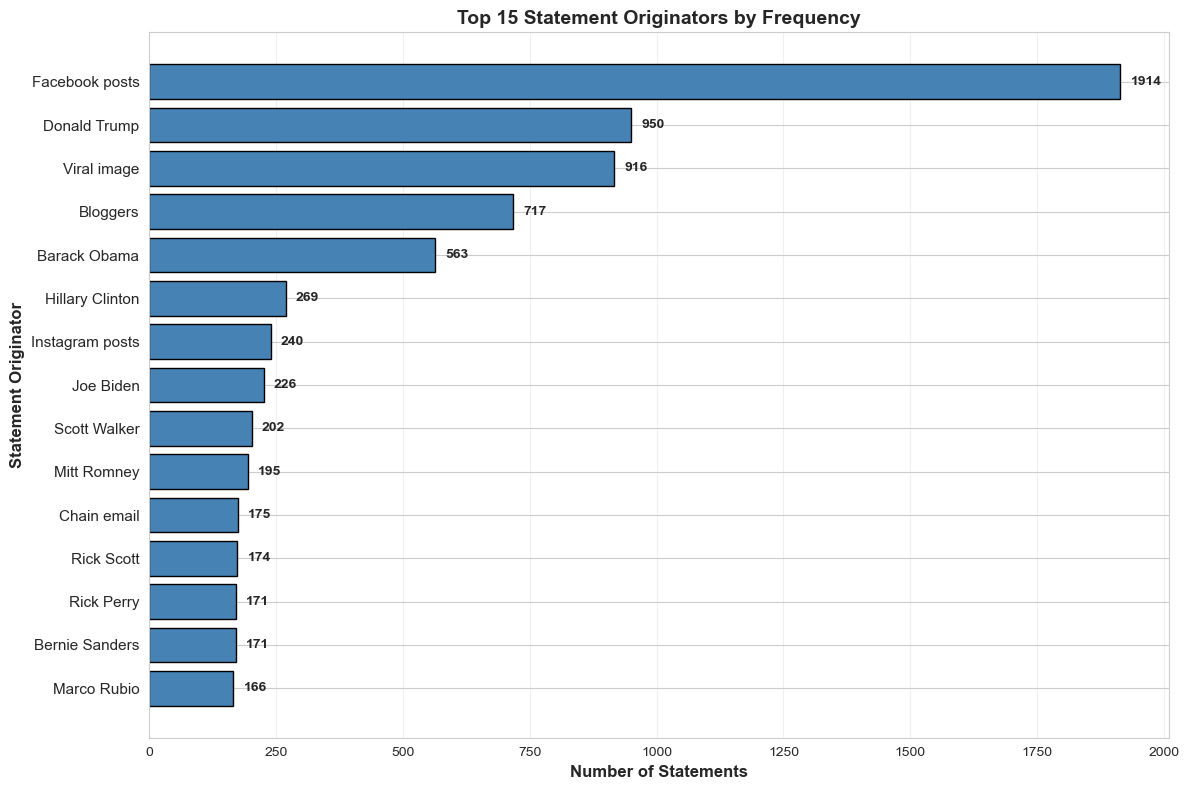


Total unique originators: 4565

Top 10 originators:
 1. Facebook posts                : 1914 statements
 2. Donald Trump                  :  950 statements
 3. Viral image                   :  916 statements
 4. Bloggers                      :  717 statements
 5. Barack Obama                  :  563 statements
 6. Hillary Clinton               :  269 statements
 7. Instagram posts               :  240 statements
 8. Joe Biden                     :  226 statements
 9. Scott Walker                  :  202 statements
10. Mitt Romney                   :  195 statements


In [5]:
print("EDA #2: TOP STATEMENT ORIGINATORS - POLITIFACT")

# Get top 15 statement originators
top_originators = df_politifact['statement_originator'].value_counts().head(15)

# Create visualization
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(range(len(top_originators)), top_originators.values, color='steelblue', edgecolor='black', linewidth=1)
ax.set_yticks(range(len(top_originators)))
ax.set_yticklabels(top_originators.index, fontsize=11)
ax.set_xlabel('Number of Statements', fontsize=12, fontweight='bold')
ax.set_ylabel('Statement Originator', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Statement Originators by Frequency', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add count labels
for i, v in enumerate(top_originators.values):
    ax.text(v + 20, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTotal unique originators: {df_politifact['statement_originator'].nunique()}")
print(f"\nTop 10 originators:")
for i, (originator, count) in enumerate(top_originators.head(10).items(), 1):
    print(f"{i:2d}. {originator:30s}: {count:4d} statements")

Findings from Top Statement Originators EDA:

- Social Media & Online Content are Key Sources: The most significant finding is the dominance of non-individual, online sources. "Facebook posts" is the #1 originator with 1,914 statements, nearly double the next source. When combined with "Viral image" (#3) and "Bloggers" (#4), it's clear that a huge portion of the dataset originates from social media and online platforms rather than a specific person.

- High-Profile Politicians are Frequent Topics: As expected from a political dataset, prominent politicians are the most common individual originators. Donald Trump is the most frequent individual (950 statements), followed by Barack Obama (563), Hillary Clinton (269) and Joe Biden (226).

- "Long Tail" of Originators: The dataset has 4,565 unique originators, but the top 15 account for a very large portion of the statements. This is a classic "long tail" distribution, where a few sources are extremely prolific, and thousands of others contribute only one or two statements each.

### 3. Temporal Analysis

EDA #3: TEMPORAL ANALYSIS - POLITIFACT


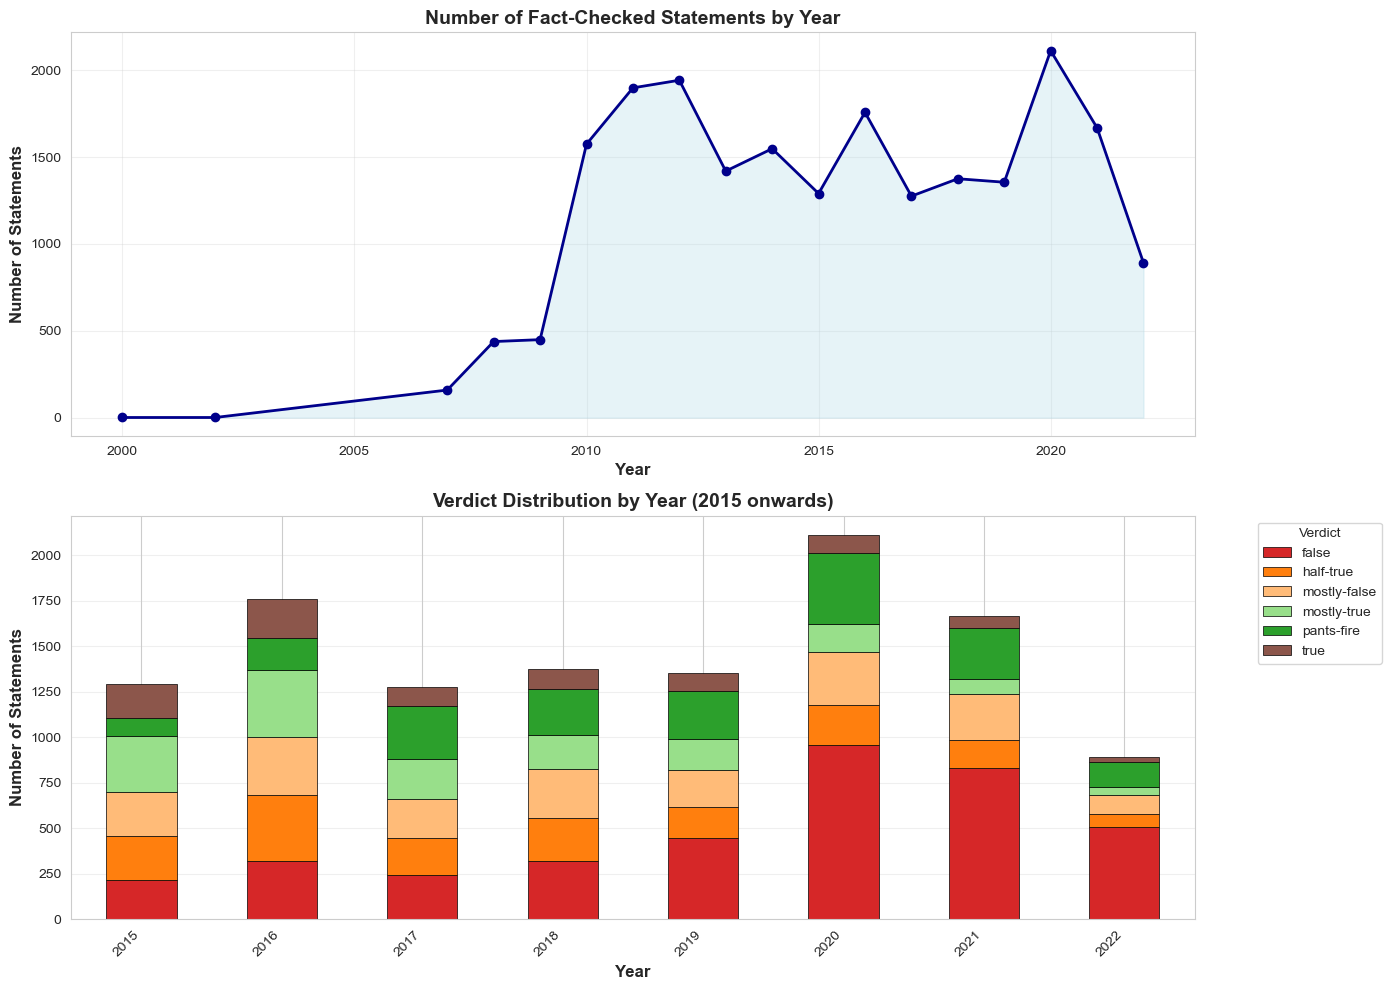


Date range: 2000-10-01 to 2022-07-09
Years covered: 22 years

Statements by year (last 5 years):
  2018: 1375 statements
  2019: 1355 statements
  2020: 2112 statements
  2021: 1668 statements
  2022:  891 statements

Average time from statement to fact-check: 15.4 days
Median time from statement to fact-check: 6.0 days


In [6]:
print("EDA #3: TEMPORAL ANALYSIS - POLITIFACT")

# Convert dates to datetime
df_politifact['statement_date_parsed'] = pd.to_datetime(df_politifact['statement_date'], errors='coerce')
df_politifact['factcheck_date_parsed'] = pd.to_datetime(df_politifact['factcheck_date'], errors='coerce')

# Extract year and month
df_politifact['statement_year'] = df_politifact['statement_date_parsed'].dt.year
df_politifact['statement_month'] = df_politifact['statement_date_parsed'].dt.to_period('M')

# Remove any NaT values
df_temporal = df_politifact.dropna(subset=['statement_year'])

# Create figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Statements by year
yearly_counts = df_temporal['statement_year'].value_counts().sort_index()
axes[0].plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2, markersize=6, color='darkblue')
axes[0].fill_between(yearly_counts.index, yearly_counts.values, alpha=0.3, color='lightblue')
axes[0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Statements', fontsize=12, fontweight='bold')
axes[0].set_title('Number of Fact-Checked Statements by Year', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Verdict distribution by year (stacked bar for recent years)
recent_years = df_temporal[df_temporal['statement_year'] >= 2015]
verdict_by_year = recent_years.groupby(['statement_year', 'verdict']).size().unstack(fill_value=0)

verdict_by_year.plot(kind='bar', stacked=True, ax=axes[1], 
                     color=['#d62728', '#ff7f0e', '#ffbb78', '#98df8a', '#2ca02c', '#8c564b'],
                     edgecolor='black', linewidth=0.5)
axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Statements', fontsize=12, fontweight='bold')
axes[1].set_title('Verdict Distribution by Year (2015 onwards)', fontsize=14, fontweight='bold')
axes[1].legend(title='Verdict', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print temporal statistics
print(f"\nDate range: {df_temporal['statement_date_parsed'].min().date()} to {df_temporal['statement_date_parsed'].max().date()}")
print(f"Years covered: {int(df_temporal['statement_year'].max() - df_temporal['statement_year'].min())} years")
print(f"\nStatements by year (last 5 years):")
for year, count in yearly_counts.tail(5).items():
    print(f"  {int(year)}: {count:4d} statements")

# Calculate average time between statement and fact-check
df_temporal['days_to_factcheck'] = (df_temporal['factcheck_date_parsed'] - df_temporal['statement_date_parsed']).dt.days
avg_days = df_temporal['days_to_factcheck'].mean()
median_days = df_temporal['days_to_factcheck'].median()
print(f"\nAverage time from statement to fact-check: {avg_days:.1f} days")
print(f"Median time from statement to fact-check: {median_days:.1f} days")

Findings from Temporal Analysis EDA :

- Event-Driven Volume: The total number of fact-checks is not consistent. It shows a dramatic increase starting around 2008, with significant peaks corresponding to major U.S. election cycles (e.g., 2012, 2016, and the highest peak in 2020). This confirms the dataset is highly sensitive to political events.

- "False" Verdicts Spiked in 2020: Looking at the stacked bar chart (2015-2022), the year 2020 not only had the highest volume of statements but also a proportionally larger share of "false" verdicts (the red section) compared to other years. This suggests that the events of 2020 (election, pandemic, etc.) generated an unusual spike in "false" claims.

- Verdict Proportions are (Mostly) Stable Otherwise: In non-peak years like 2015-2019, the ratio of the different verdicts appears relatively consistent, with "false" being the largest block, followed by "half-true" and "mostly-false."

# Snopes Dataset

In [11]:
# Load Snopes Dataset
print("Snopes Dataset")


# Define file path
snopes_path = Path('/Users/satwik/Documents/GitHub/UF-EEE6778-Fall25-TermProject/data/raw/snopeswithsum.csv')
# Load CSV file
df_snopes = pd.read_csv(snopes_path)
print(f"\n✓ Snopes dataset loaded successfully!")
print(f"Dataset shape: {df_snopes.shape}")


# Basic Data Exploration - Snopes

print("1. First Few Rows (head)")
print(df_snopes.head())


print("2. Dataset Information (info)")
df_snopes.info()


print("3. Statistical Summary (describe)")
print(df_snopes.describe(include='all'))


print("4. Column Names")
print("Columns:", list(df_snopes.columns))


print("5. Missing Values")
missing_values_snopes = df_snopes.isnull().sum()
missing_percentage_snopes = (missing_values_snopes / len(df_snopes)) * 100
missing_df_snopes = pd.DataFrame({
    'Missing Count': missing_values_snopes,
    'Percentage': missing_percentage_snopes
})
print(missing_df_snopes[missing_df_snopes['Missing Count'] > 0])

Snopes Dataset

✓ Snopes dataset loaded successfully!
Dataset shape: (4550, 9)
1. First Few Rows (head)
                                                                      question  \
0           Did Kamala Harris Support Abortion Until the Time of Giving Birth?   
1                                   Did Hitler Invent the Inflatable Sex Doll?   
2                  Does Texting ‘RBG’ to 50409 Send a Letter to Your Senators?   
3                                             Pride Parade Fire Hydrant Mishap   
4  Swedish Police Hand Out ‘Don’t Touch Me’ Bracelets to Stop Refugee Rapists?   

                                                                                               comment  \
0  The Democratic vice-presidential candidate's pro-abortion-rights record has come under scrutiny ...   
1                                Nothing attracts curiosity like a lurid combination of Nazis and sex.   
2  The automated political advocacy service Resistbot ran another campaign following 

### Basic Exploratory Data Analysis on Snopes Dataset

### 1. Rating Distribution - Snopes

EDA #4: RATING DISTRIBUTION - SNOPES


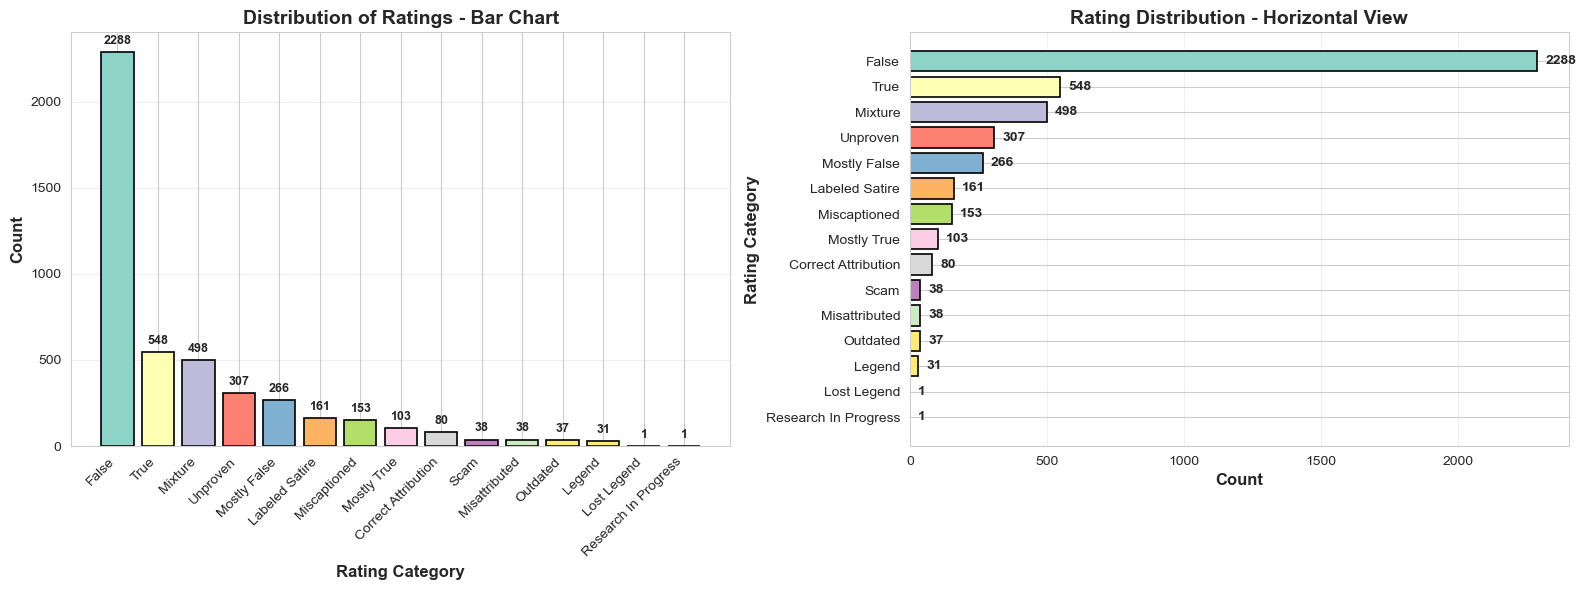


Total fact-checks: 4550
Unique rating categories: 15

Rating distribution:
  False               : 2288 (50.29%)
  True                :  548 (12.04%)
  Mixture             :  498 (10.95%)
  Unproven            :  307 ( 6.75%)
  Mostly False        :  266 ( 5.85%)
  Labeled Satire      :  161 ( 3.54%)
  Miscaptioned        :  153 ( 3.36%)
  Mostly True         :  103 ( 2.26%)
  Correct Attribution :   80 ( 1.76%)
  Scam                :   38 ( 0.84%)
  Misattributed       :   38 ( 0.84%)
  Outdated            :   37 ( 0.81%)
  Legend              :   31 ( 0.68%)
  Lost Legend         :    1 ( 0.02%)
  Research In Progress:    1 ( 0.02%)


In [12]:
print("EDA #4: RATING DISTRIBUTION - SNOPES")

# Get rating distribution
rating_counts = df_snopes['rate'].value_counts()

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
colors_snopes = plt.cm.Set3(range(len(rating_counts)))
axes[0].bar(range(len(rating_counts)), rating_counts.values, color=colors_snopes, edgecolor='black', linewidth=1.2)
axes[0].set_xticks(range(len(rating_counts)))
axes[0].set_xticklabels(rating_counts.index, rotation=45, ha='right')
axes[0].set_xlabel('Rating Category', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Ratings - Bar Chart', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(rating_counts.values):
    axes[0].text(i, v + 30, str(v), ha='center', va='bottom', fontweight='bold', fontsize=9)

# Horizontal bar chart for better readability
axes[1].barh(range(len(rating_counts)), rating_counts.values, color=colors_snopes, edgecolor='black', linewidth=1.2)
axes[1].set_yticks(range(len(rating_counts)))
axes[1].set_yticklabels(rating_counts.index, fontsize=10)
axes[1].set_xlabel('Count', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Rating Category', fontsize=12, fontweight='bold')
axes[1].set_title('Rating Distribution - Horizontal View', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

# Add count labels
for i, v in enumerate(rating_counts.values):
    axes[1].text(v + 30, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nTotal fact-checks: {len(df_snopes)}")
print(f"Unique rating categories: {df_snopes['rate'].nunique()}")
print(f"\nRating distribution:")
for rating, count in rating_counts.items():
    percentage = (count / len(df_snopes)) * 100
    print(f"  {rating:20s}: {count:4d} ({percentage:5.2f}%)")

Findings from Snopes Rating Distribution EDA:

- Extreme Class Imbalance: This dataset is even more imbalanced than the Politifact data. There are 15 unique rating categories, but the distribution is completely dominated by one.

- "False" is the Overwhelming Majority: The "False" rating accounts for 50.29% of the entire dataset (2,288 entries). This means a model that only predicts "False" would be correct half the time.

- Very "Long Tail" of Ratings: We have total 15 categories, but most are extremely rare. The top 3 ("False," "True," "Mixture") make up over 73% of the data. The bottom 8 categories (from "Correct Attribution" down) combined account for less than 7% of the dataset.

- High Granularity: Snopes uses a much more specific rating system than Politifact. It doesn't just rate truthiness (true, false, mixture) but also the reason for the rating (e.g., "Miscaptioned," "Labeled Satire," "Misattributed," "Outdated").

### 2. Missing Data Analysis - Snopes

EDA #5: MISSING DATA ANALYSIS - SNOPES


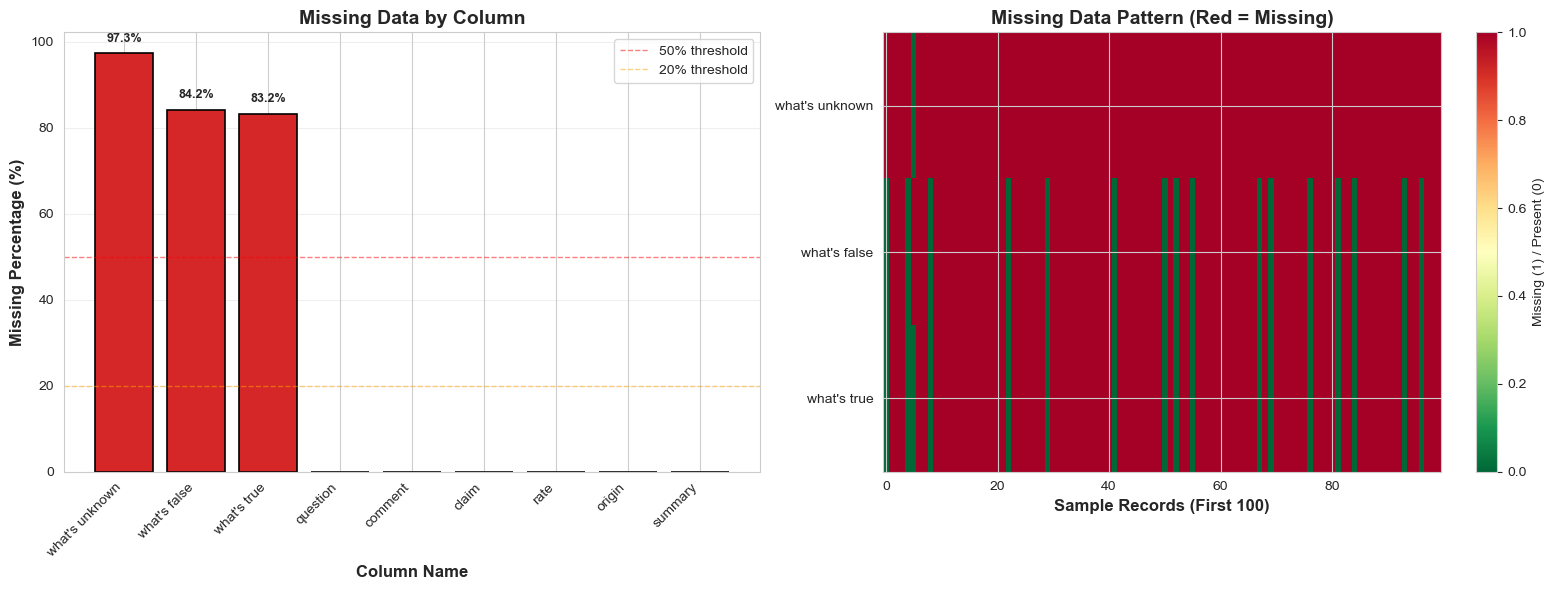


Missing data summary:
  Columns with >80% missing: 3
  Columns with 20-80% missing: 0
  Columns with <20% missing: 6

Columns with missing data:
  what's unknown      : 4429 missing ( 97.3%)
  what's false        : 3831 missing ( 84.2%)
  what's true         : 3785 missing ( 83.2%)


In [13]:
print("EDA #5: MISSING DATA ANALYSIS - SNOPES")

# Calculate missing values
missing_data = df_snopes.isnull().sum()
missing_percentage = (missing_data / len(df_snopes)) * 100

# Create DataFrame for visualization
missing_df_snopes = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Percentage': missing_percentage.values
}).sort_values('Percentage', ascending=False)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of missing percentages
colors_missing = ['#d62728' if x > 50 else '#ff7f0e' if x > 20 else '#2ca02c' 
                  for x in missing_df_snopes['Percentage']]
axes[0].bar(range(len(missing_df_snopes)), missing_df_snopes['Percentage'], 
           color=colors_missing, edgecolor='black', linewidth=1.2)
axes[0].set_xticks(range(len(missing_df_snopes)))
axes[0].set_xticklabels(missing_df_snopes['Column'], rotation=45, ha='right')
axes[0].set_xlabel('Column Name', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Missing Data by Column', fontsize=14, fontweight='bold')
axes[0].axhline(y=50, color='red', linestyle='--', linewidth=1, alpha=0.5, label='50% threshold')
axes[0].axhline(y=20, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='20% threshold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Add percentage labels
for i, v in enumerate(missing_df_snopes['Percentage']):
    if v > 0:
        axes[0].text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Heatmap-style visualization
columns_to_show = missing_df_snopes[missing_df_snopes['Missing Count'] > 0]['Column'].tolist()
if columns_to_show:
    missing_matrix = df_snopes[columns_to_show].isnull().astype(int)
    sample_size = min(100, len(df_snopes))
    sample_matrix = missing_matrix.head(sample_size)
    
    im = axes[1].imshow(sample_matrix.T, cmap='RdYlGn_r', aspect='auto', interpolation='nearest')
    axes[1].set_yticks(range(len(columns_to_show)))
    axes[1].set_yticklabels(columns_to_show, fontsize=10)
    axes[1].set_xlabel(f'Sample Records (First {sample_size})', fontsize=12, fontweight='bold')
    axes[1].set_title('Missing Data Pattern (Red = Missing)', fontsize=14, fontweight='bold')
    plt.colorbar(im, ax=axes[1], label='Missing (1) / Present (0)')

plt.tight_layout()
plt.show()

# Print detailed analysis
print(f"\nMissing data summary:")
print(f"  Columns with >80% missing: {len(missing_df_snopes[missing_df_snopes['Percentage'] > 80])}")
print(f"  Columns with 20-80% missing: {len(missing_df_snopes[(missing_df_snopes['Percentage'] > 20) & (missing_df_snopes['Percentage'] <= 80)])}")
print(f"  Columns with <20% missing: {len(missing_df_snopes[missing_df_snopes['Percentage'] <= 20])}")

print(f"\nColumns with missing data:")
for _, row in missing_df_snopes[missing_df_snopes['Missing Count'] > 0].iterrows():
    print(f"  {row['Column']:20s}: {int(row['Missing Count']):4d} missing ({row['Percentage']:5.1f}%)")

Findings from Missing Data Analysis EDA :

- Three Columns are Unusable: Generally , Any column with over 80% missing data is generally unusable for modeling. The most glaring finding is that three columns are almost entirely empty:

what's unknown: 97.3% missing

what's false: 84.2% missing

what's true: 83.2% missing 

- Core Features are Clean: The Critical columns (question, comment, claim, rate, origin, summary) have very little or no missing data (all are below the 20% threshold, and likely near 0%).

- Missingness is Systematic, Not Random: The heatmap and column names suggest this isn't random missing data. It's systematic.

Hypothesis: The what's true column is likely only filled in when the rate is "True" or "Mostly True."

Hypothesis: The what's false column is only filled in when the rate is "False" or "Mostly False."

Hypothesis: The what's unknown column is only filled in when the rate is "Unproven" or "Mixture." In this case, the data isn't "missing"—it's "not applicable."

### 3. Text Length Analysis - Snopes

EDA #6: TEXT LENGTH ANALYSIS - SNOPES


/var/folders/y6/qtd6ycv52s3_5v7swnd_rhf80000gn/T/ipykernel_5629/2343623816.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, 1].boxplot(data_to_plot, labels=labels_text, patch_artist=True)


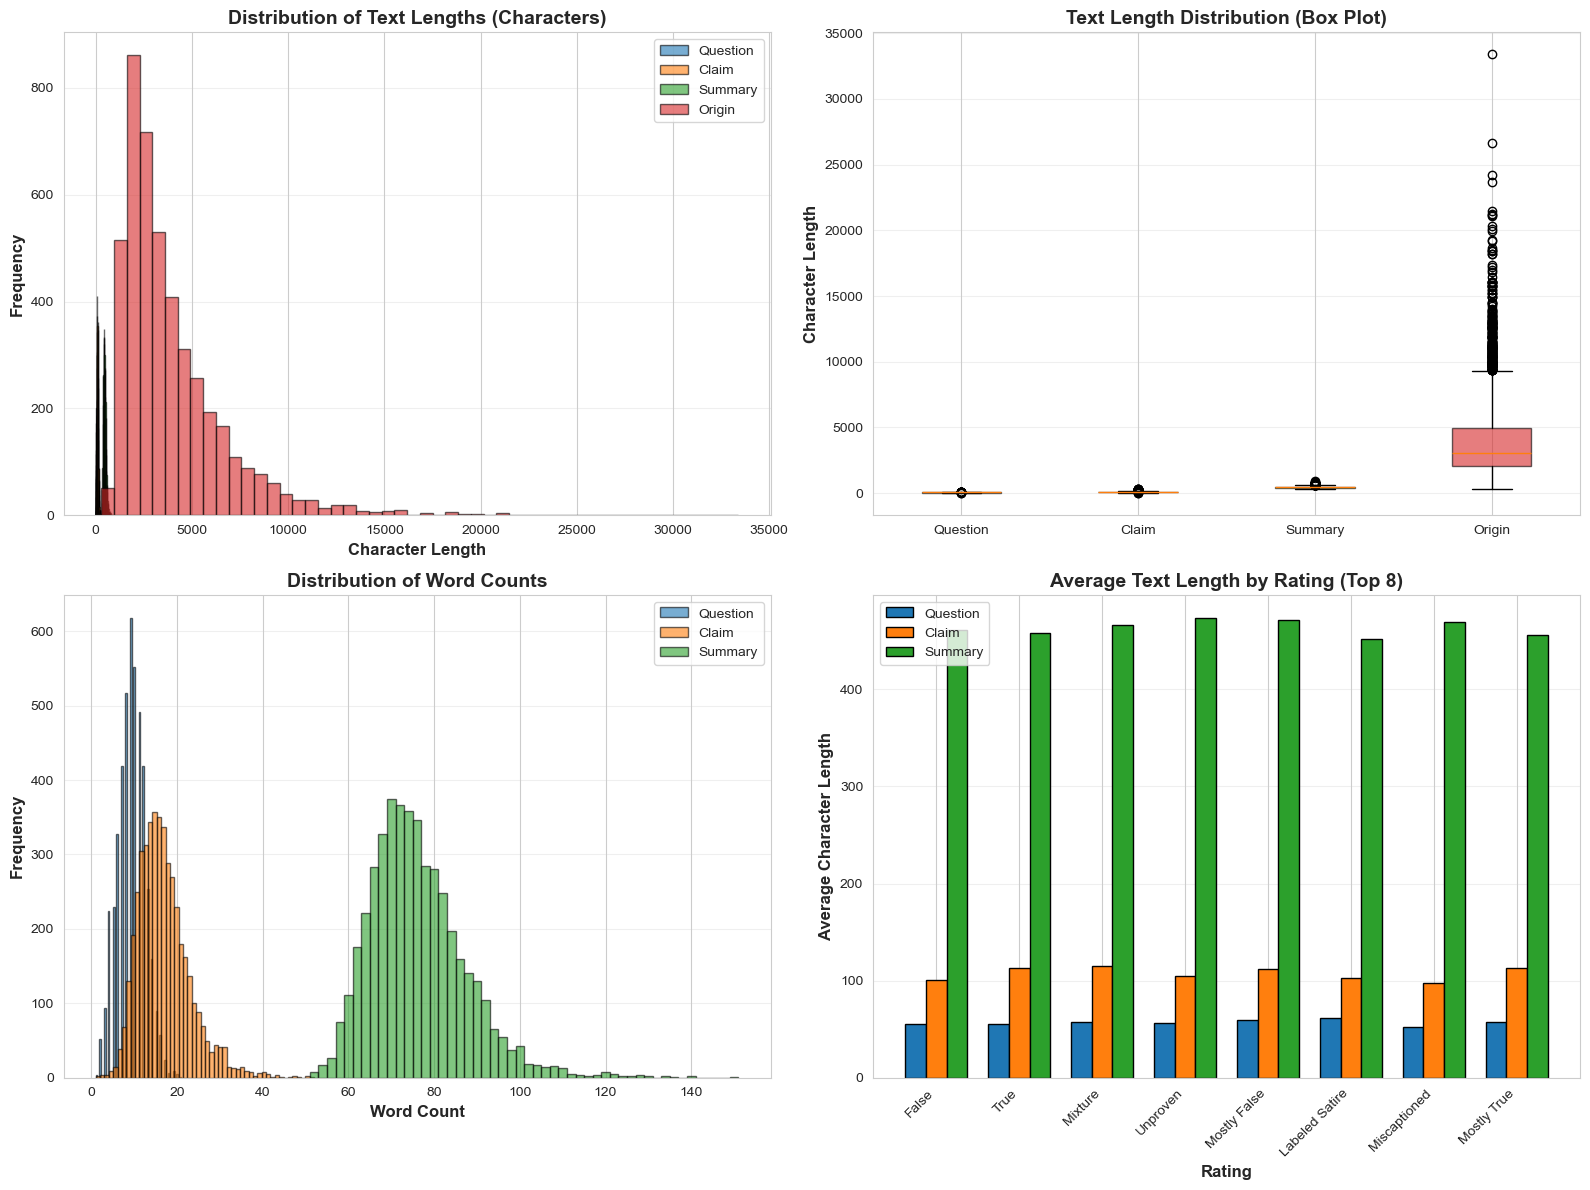


Text length statistics (characters):

Question:
  Mean: 56.0
  Median: 57.0
  Min: 7
  Max: 122
  Std Dev: 18.1

Claim:
  Mean: 105.4
  Median: 100.0
  Min: 2
  Max: 332
  Std Dev: 36.5

Summary:
  Mean: 461.8
  Median: 453.0
  Min: 303
  Max: 897
  Std Dev: 69.9

Origin:
  Mean: 3939.4
  Median: 3090.5
  Min: 295
  Max: 33395
  Std Dev: 2800.1


Word count statistics:

Question:
  Mean: 9.1 words
  Median: 9.0 words
  Min: 1 words
  Max: 21 words

Claim:
  Mean: 17.1 words
  Median: 16.0 words
  Min: 1 words
  Max: 52 words

Summary:
  Mean: 75.7 words
  Median: 74.0 words
  Min: 51 words
  Max: 151 words


In [14]:
print("EDA #6: TEXT LENGTH ANALYSIS - SNOPES")

# Calculate text lengths for key columns
df_snopes['question_length'] = df_snopes['question'].str.len()
df_snopes['claim_length'] = df_snopes['claim'].str.len()
df_snopes['summary_length'] = df_snopes['summary'].str.len()
df_snopes['origin_length'] = df_snopes['origin'].str.len()

# Calculate word counts
df_snopes['question_words'] = df_snopes['question'].str.split().str.len()
df_snopes['claim_words'] = df_snopes['claim'].str.split().str.len()
df_snopes['summary_words'] = df_snopes['summary'].str.split().str.len()

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distribution of text lengths
text_cols = ['question_length', 'claim_length', 'summary_length', 'origin_length']
colors_text = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
labels_text = ['Question', 'Claim', 'Summary', 'Origin']

for i, (col, color, label) in enumerate(zip(text_cols, colors_text, labels_text)):
    axes[0, 0].hist(df_snopes[col], bins=50, alpha=0.6, color=color, label=label, edgecolor='black')

axes[0, 0].set_xlabel('Character Length', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Distribution of Text Lengths (Characters)', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Box plot of text lengths
data_to_plot = [df_snopes['question_length'], df_snopes['claim_length'], 
                df_snopes['summary_length'], df_snopes['origin_length']]
bp = axes[0, 1].boxplot(data_to_plot, labels=labels_text, patch_artist=True)
for patch, color in zip(bp['boxes'], colors_text):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

axes[0, 1].set_ylabel('Character Length', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Text Length Distribution (Box Plot)', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Word count distribution
word_cols = ['question_words', 'claim_words', 'summary_words']
colors_words = ['#1f77b4', '#ff7f0e', '#2ca02c']
labels_words = ['Question', 'Claim', 'Summary']

for col, color, label in zip(word_cols, colors_words, labels_words):
    axes[1, 0].hist(df_snopes[col], bins=50, alpha=0.6, color=color, label=label, edgecolor='black')

axes[1, 0].set_xlabel('Word Count', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Distribution of Word Counts', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Average text length by rating
avg_by_rating = df_snopes.groupby('rate')[['question_length', 'claim_length', 'summary_length']].mean()
top_ratings = df_snopes['rate'].value_counts().head(8).index
avg_by_rating_top = avg_by_rating.loc[top_ratings]

x_pos = np.arange(len(avg_by_rating_top))
width = 0.25

axes[1, 1].bar(x_pos - width, avg_by_rating_top['question_length'], width, 
              label='Question', color='#1f77b4', edgecolor='black')
axes[1, 1].bar(x_pos, avg_by_rating_top['claim_length'], width, 
              label='Claim', color='#ff7f0e', edgecolor='black')
axes[1, 1].bar(x_pos + width, avg_by_rating_top['summary_length'], width, 
              label='Summary', color='#2ca02c', edgecolor='black')

axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(avg_by_rating_top.index, rotation=45, ha='right')
axes[1, 1].set_xlabel('Rating', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Character Length', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Average Text Length by Rating (Top 8)', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nText length statistics (characters):")
for col, label in zip(text_cols, labels_text):
    print(f"\n{label}:")
    print(f"  Mean: {df_snopes[col].mean():.1f}")
    print(f"  Median: {df_snopes[col].median():.1f}")
    print(f"  Min: {df_snopes[col].min()}")
    print(f"  Max: {df_snopes[col].max()}")
    print(f"  Std Dev: {df_snopes[col].std():.1f}")

print(f"\n\nWord count statistics:")
for col, label in zip(word_cols, labels_words):
    print(f"\n{label}:")
    print(f"  Mean: {df_snopes[col].mean():.1f} words")
    print(f"  Median: {df_snopes[col].median():.1f} words")
    print(f"  Min: {df_snopes[col].min()} words")
    print(f"  Max: {df_snopes[col].max()} words")

Findings from Text Length Analysis EDA :

- Question and Claim are short: These are "tweet-like" texts. Question is very short (avg. 9 words), and Claim is also brief (avg. 17 words). Their distributions are tight (Mean and Median are almost identical).

- Summary is paragraph-length: This column is consistently a medium-sized paragraph (avg. 75 words) and has a very clean, normal distribution.

- Origin is "Dirty" and Skewed: This column is a problem. The mean character length (3,939) is significantly larger than the median (3,090), and the box plot shows a massive number of extreme outliers (up to 33,395 characters). This strongly suggests the Origin field contains more than just a simple source name—it likely has raw HTML, entire copied articles, or long lists of URLs.

- Text Length is NOT a Predictive Feature: The "Average Text Length by Rating" chart is the most important one here. It shows that the average length for Question, Claim, and Summary is almost identical across all the top 8 ratings ("False," "True," "Mixture," "Unproven," etc.).